# **Desafio Data Science**

### Blibliotecas utilizadas e suas respectivas versões

In [345]:
import seaborn as sn 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
!pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.0
asgiref==3.2.3
astor==0.8.1
astropy==3.0.5
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.10.40
botocore==1.13.40
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==4.0.0
certifi==2019.11.28
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
daft==0.0.4
dask==1.1.5
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0
dlib==19.18.0
dm-sonnet==1.35
docopt==0.6.2
docu

Primeiramente, faremos a leitura do CSV. Nota-se que o separador utilizado será `;` já que os dados não estão separados pelo separador padrão (`,`). 

In [0]:
data = pd.read_csv("bank/bank-full.csv", delimiter=';')

Visualizando uma amostra do Dataframe, podemos confirmar que os dados foram lidos corretamente. 

In [348]:
data.sample(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6136,52,admin.,married,secondary,no,876,no,no,unknown,27,may,227,3,-1,0,unknown,no
33963,59,retired,married,secondary,no,493,no,no,cellular,30,apr,237,1,-1,0,unknown,yes
3610,42,blue-collar,married,primary,no,2519,yes,no,unknown,15,may,262,4,-1,0,unknown,no
21054,47,technician,married,secondary,no,-9,no,no,cellular,14,aug,457,2,-1,0,unknown,no
34340,57,retired,married,tertiary,no,1458,no,no,telephone,4,may,89,5,-1,0,unknown,no
33246,31,blue-collar,single,secondary,no,88,yes,no,cellular,20,apr,21,5,-1,0,unknown,no
40700,63,retired,married,tertiary,no,8103,no,no,cellular,7,aug,258,1,-1,0,unknown,no
35811,47,services,married,secondary,no,759,yes,no,telephone,8,may,75,1,323,2,failure,no


O *dataset* consiste em uma campanha de marketing onde coletou-se dados de cada um dos clientes do banco e tentou-se convencê-los a realizar um "*term deposit*".

Cada linha do dataframe corresponde a um dos clientes contatados e as colunas suas respectivas informações. 

### **1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**

O *dataset* consta dois tipos de empréstimos: *house loans* e *personal loans*.

Isolaremos apenas os indivíduos que fizeram empréstimos, e, então, os agruparemos de acordo com suas profissões. Por fim, contamos estes, obtendo o total de indivíduos por profissão que realizaram empréstimos.

Além do total, também calcularemos o percentual relativo de cada emprego, ou seja, o percentual de clientes com empréstimos considerando apenas clientes de uma classe de emprego.

In [347]:
has_loan = data['loan']=='yes'
loans = data[['job','loan']][has_loan]
loans = loans.groupby('job').count()
loans['l_relative_%'] = (loans['loan']/data[['job','loan']].groupby('job').count()['loan'])*100

has_house = data['housing']=='yes'
houses = data[['job','housing']][has_house]
houses = houses.groupby('job').count()
houses['h_relative_%'] = (houses['housing']/data[['job','housing']].groupby('job').count()['housing'])*100

table = pd.concat([loans, houses], axis=1)
table

,loan,l_relative_%,housing,h_relative_%
job,,,,
admin.,991,19.164572,3182,61.535486
blue-collar,1684,17.303740,7048,72.420880
entrepreneur,356,23.940820,869,58.439812
housemaid,152,12.258065,398,32.096774
management,1253,13.248044,4678,49.460774
retired,309,13.648410,491,21.687279
self-employed,229,14.502850,765,48.448385
services,836,20.125181,2766,66.586423
student,12,1.279318,249,26.545842


In [349]:
print("Personal Loans:\n")
print('Profissão com maior valor ABSOLUTO de empréstimos:')
print(f"{table['loan'].idxmax()} => {table['loan'].max()}")
print()
print('Profissão com maior valor RELATIVO de empréstimos:')
print(f"{table['l_relative_%'].idxmax()} => {table['l_relative_%'].max():0.2f}%")
print('\n')
print("Housing Loans:\n")
print('Profissão com maior valor ABSOLUTO de empréstimos:')
print(f"{houses['housing'].idxmax()} => {houses['housing'].max()}")
print()
print('Profissão com maior valor RELATIVO de empréstimos:')
print(f"{houses['h_relative_%'].idxmax()} => {houses['h_relative_%'].max():0.2f}%")

Personal Loans:

Profissão com maior valor ABSOLUTO de empréstimos:
blue-collar => 1684

Profissão com maior valor RELATIVO de empréstimos:
entrepreneur => 23.94%


Housing Loans:

Profissão com maior valor ABSOLUTO de empréstimos:
blue-collar => 7048

Profissão com maior valor RELATIVO de empréstimos:
blue-collar => 72.42%


#### **Resposta EX1**:

A profissão com maior tendência de empréstimos é '*blue-collar*', sendo que '*housing loans*' é o tipo mais comum.

### **2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?**

A fim de visualizar a relação entre o número de vezes que o cliente foi contatado e o sucesso da campanha, será repetido o exemplo anterior: criaremos uma tabela que mostra o número absoluto e relativo de sucessos dado uma contagem de contatos.


In [0]:
success = data['y']=='yes'
campaings = data[['campaign','y']][success]
campaings = campaings.groupby('campaign').count()
campaings['relative_%'] = (campaings['y']/data[['campaign','y']].groupby('campaign').count()['y'])*100

Para facilitar a vizualização, ilustraremos tal tabela com um gráfico.


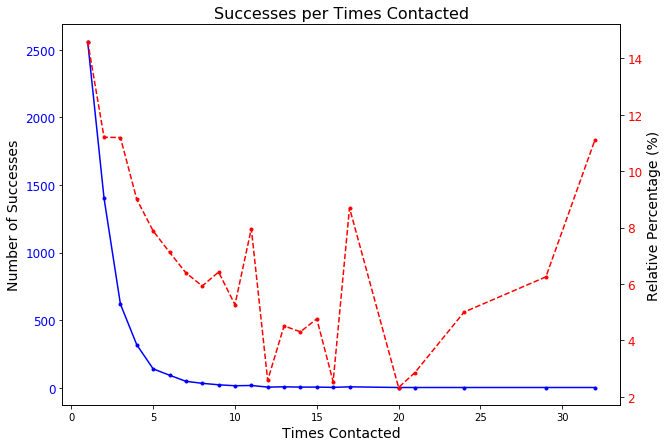

In [353]:
x = list(campaings.index)
y = list(campaings['y'])
r = list(campaings['relative_%'])

fig, ax1 = plt.subplots(figsize = (10,7))

ax1.set_ylabel('Number of Successes', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.plot(x, y, linestyle='-', color='blue', marker='.')

ax2 = ax1.twinx()
ax2.set_ylabel('Relative Percentage (%)', fontsize=14)
ax2.plot(x, r, linestyle='--', color='red', marker='.')
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

ax1.set_xlabel("Times Contacted", fontsize=14)
plt.title("Successes per Times Contacted", fontsize=16)
plt.show()

#### **Resposta EX2:**

Observa-se que, em geral, contatar múltiplas vezes um indivíduo não compensa, pois alcança um número menor de pessoas, e não garante maior taxa de sucesso, fazendo com que tanto o valor absoluto quanto o relativo sejam maiores para casos em que foram feitos poucos contatos.

### **3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**



A partir da tabela e gráfico em **2.**, observa-se que um número menor de ligações permite que mais pessoas sejam contatadas e apresenta maior taxa de sucesso. De cinco ligacões em diante, temos que o valor estabiliza em poucos sucessos. Apesar das taxa de sucesso relativo aumentarem para altos números de ligações, o valor absoluto é muito baixo para ser relevado.

#### **Resposta EX3:**

A média de ligações deve ser próxima à uma por pessoas, já que apresenta melhor taxa de sucesso (absoluto e relativo), e o máximo seriam quatro ligações, uma vez que o número de sucessos aproxima-se de seu mínimo deste ponto em diante.

### **4. O resultado da campanha anterior tem relevância na campanha atual?**


O atributo *poutcome* define o resultado da campanha anterior em relação a um indivíduo.
Apenas as categorias *success* e *failure* do *poutcome* importam já que as outras (*unknown* e *other*) não agregam informação para a questão.

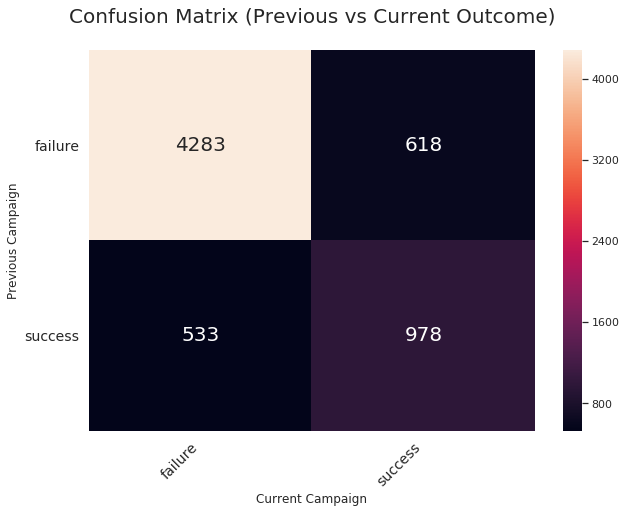

In [362]:
filtering = (data['poutcome']=='failure') | (data['poutcome']=='success')

ex2 = data[['poutcome','y']][filtering] # Pega amostras com 'poutcome' válidos

# Transforma 'y' e 'poutcome' em valores numéricos (label encoding) 
bool_y, label_y = pd.factorize(ex2['y'])        
bool_p, label_p = pd.factorize(ex2['poutcome']) 

# Plota a matriz de confusão
df_cm = pd.DataFrame(cm(bool_p, bool_y), index=label_p, columns=label_p)
plt.figure(figsize = (10,7))
plot = sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt="d")
plot.yaxis.set_ticklabels(plot.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plot.xaxis.set_ticklabels(plot.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
sn.set(font_scale=1)
plt.ylabel('Previous Campaign')
plt.xlabel('Current Campaign')
plt.title("Confusion Matrix (Previous vs Current Outcome)\n", size=20)
plt.show()

In [363]:
print(f'Tamanho da amostra em relação ao total: {((533+978+4283+618)/len(data))*100:0.2f}%')
print(f'Sucessos atuais contidos na amostra: {(978+618)/len(data[data["y"]=="yes"])*100:0.2f}%')
print(f'Sucessos da anterior que continuram na atual: {978/(533+978)*100:0.2f}%')
print(f'Fracassos da anterior que negaram a atual: {4283/(4283+618)*100:0.2f}%')


Tamanho da amostra em relação ao total: 14.18%
Sucessos atuais contidos na amostra: 30.18%
Sucessos da anterior que continuram na atual: 64.73%
Fracassos da anterior que negaram a atual: 87.39%


Apesar da amostra que apresenta os resultados da campanha anterior ser cerca de 14% do total de dados, temos que 30% dos sucessos da campanha atual estão contidos nessa amostra.

Observando a matriz de confusão, podemos notar que há uma grande tendência de que indivíduos que recusaram a campanha anterior também recusarão a atual. Nota-se, também, que boa parcela dos sucessos na campanha anterior se mantém na campanha atual.


#### **Resposta EX4:**

A partir da análise, podemos assumir que o resultado da campanha anterior é relevante para atual. Seria benéfico, por exemplo, dar prioridades a indivíduos que já participaram de alguma campanha pois teriam maior probabilidade de sucesso em relação aos que não participaram.

### **5. Qual o fator determinante para que o banco exija um seguro de crédito?**



**Observação:** Não compreendi direito a pergunta e o atributo *default*. Assumi que tal atributo indica "*yes*" para caso seja crédito padrão e "*no*" para crédito com exigência de seguro.

Utilizaremos a técnica de *Feature Importance* para listar quais variáveis são mais relevantes para determinar a variável *default*. Também serão descartadas informações de contato e campanha para evitar associações errôneas. 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


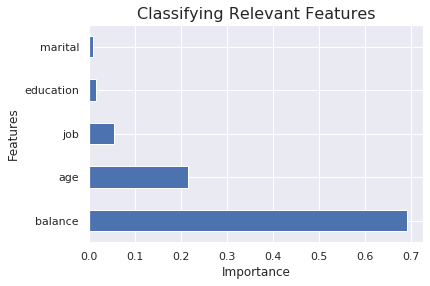

In [373]:
# Isolaremos apenas fetures de interesse
df = pd.DataFrame(data.iloc[:,:8])

# Separamos features e target variable
X = df.drop('default', axis=1)
Y = df[['default']]

# Trasformamos texto para dado numérico (label encoding)
for col in list(set(X.columns)-set(['age', 'balance'])):
  X[col] = pd.factorize(X[col])[0]

# Instanciamos e treinamos o classificador
model = ExtraTreesClassifier()
model.fit(X, Y.values.ravel())

main_features = pd.Series(model.feature_importances_, index=X.columns)
main_features.nlargest(5).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Classifying Relevant Features", size=16)
plt.show()

Dada a classificação, temos que os atrubutos *balance* e *age* são os mais relevante para a análise. Assim, podemos agupar estes valores de acordo com a variável *default* e analisar as características de cada grupo.

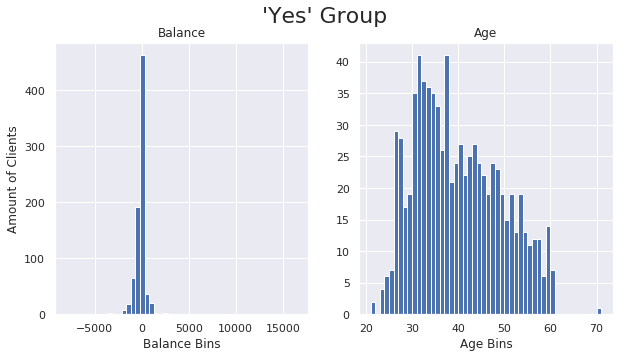

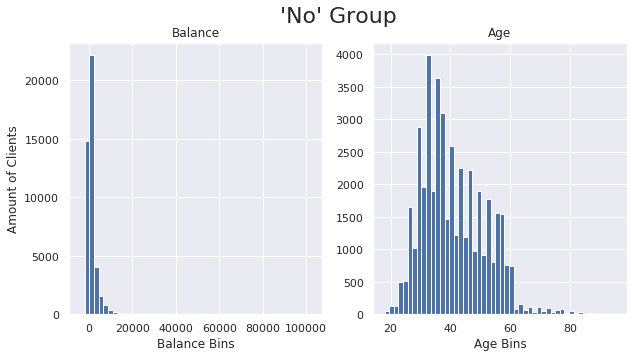

In [376]:
# Isolando features mais relevantes
df = pd.DataFrame(data[['age','balance','default']])

# Plotando grupo 'YES'
fig1, ax1 = plt.subplots(1, 2, sharex="col", figsize=(10,5))
fig1.suptitle("'Yes' Group", size=22)
ax1[0].title.set_text("Balance")
ax1[1].title.set_text("Age")
ax1[0].set_ylabel("Amount of Clients")
ax1[0].set_xlabel("Balance Bins")
ax1[1].set_xlabel("Age Bins")

df[df['default']=='yes']['balance'].hist(ax=ax1[0],bins=50)
df[df['default']=='yes']['age'].hist(ax=ax1[1], bins=50)

# Plotando grupo 'NO'
fig2, ax2 = plt.subplots(1, 2, sharex="col", figsize=(10,5))
fig2.suptitle("'No' Group", size=22)
ax2[0].title.set_text("Balance")
ax2[1].title.set_text("Age")
ax2[0].set_ylabel("Amount of Clients")
ax2[0].set_xlabel("Balance Bins")
ax2[1].set_xlabel("Age Bins")

df[df['default']=='no']['balance'].hist(ax=ax2[0],bins=50)
df[df['default']=='no']['age'].hist(ax=ax2[1], bins=50)

plt.show()

Quanto ao balanço, ambos os histogramas apresentam picos pŕoximos, todavia, parece haver uma pequena relação quanto a saldo positivo e a exigência de seguro de crédito (possívelmente por causa de uma má interpretação dos dados), o que aparenta ser incoerente.

Comparando os gráficos, temos que a idade parece restritiva quanto a isenção do seguro de crédito. Contas sem tal exigência aparentam restritas as pessoas entre 21 e 60 anos. Tal característica pode estar relacionada a participação do indivíduo no merdado de trabalho, o que reforçado pelo fato que *job* é o terceiro atributo mais importante.

#### **Resposta EX5:**

O fator determinante para exigência de seguro de crédito aparenta ser a idade do cliente, uma vez que quase não há ocorrências de pessoas menores que 21 ou maiores que 60 sem exigência de seguro de crédito, e que esta é a idade empregatícia. 

### **6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**




Nesta parte, utilizaremos dois conceitos que nos ajudarão a estabelecer um coeficiente de dependência entre a variável objetivo e os outros atributos: *Weight of Evidence* e *Information Value*.

##### **Função para Calculo de WoE e IV**


In [0]:
def iv(df, col, targ):
  # Cálculo do total de eventos e não-eventos
  event_total = len(df[df[targ]=='yes'])
  nonevent_total = len(df[df[targ]=='no'])

  elements = list(df[col].unique())
  woe_vals = []
  iv_vals = []
  
  # Dividimos os dados em dois grupos: evento e não-evento
  event = df[df[targ]=='yes']   
  nonevent = df[df[targ]=='no']
  
  # Calculamos WoE e IV para cada uma das variaveis de uma coluna
  for e in elements:
    # Percentual da variável 'e' pelo total de eventos
    event_percent = len(event[event[col]==e])/event_total           
    # Percentual da variável 'e' pelo total de não-eventos 
    nonevent_percent = len(nonevent[nonevent[col]==e])/event_total
    # Calculo de WoE e IV
    woe_vals.append(np.log(event_percent/nonevent_percent))
    iv_vals.append((event_percent-nonevent_percent)*woe_vals[-1])

  # Retorna tabela com WoE e IV de cada uma das variáveis do atributo
  return pd.DataFrame(zip(woe_vals, iv_vals), index=elements, columns=['woe','iv'])

Com a função para calcular WoE e IV, podemos testar todos os atributos e observar qual apresenta maior correlação quanto a um atributo alvo.

Antes de poder aplicar a função, precisamos discretizar atributos continuos do *dataset*.

In [0]:
# Pegamos apenas atributos úteis
df = pd.DataFrame(data.iloc[:,:8])

# Discretizamos 'balance' e 'age' (binning)
df['age_bin'] = pd.qcut(df['age'], 7) 
df['balance_bin'] = pd.qcut(df['balance'], 10)
df = df.drop(labels=['balance','age'], axis=1)

Com o *dataframe* processado, podemos aplicar a função para calcular WoE e IV e fazer a somatória de cada um dos atributos para saber qual é o mais relevante. 

In [386]:
iv_totals = []
index = list(df.drop('housing', axis=1).keys())
for att in index:
  iv_totals.append(iv(df, att, 'housing')['iv'].sum())

pd.DataFrame(iv_totals, index=index, columns=['IV'])

,IV
job,0.356753
marital,0.046618
education,0.096786
default,0.045194
loan,0.051374
age_bin,0.210806
balance_bin,0.071181


Temos uma tabela de referência para saber distinguir os atributos relevantes.

![](https://miro.medium.com/max/1156/1*5S_5aAHWe0_knDGZUK3W8w.png)

Comparando os valores da tabela com os do *dataframe* obtido, temos dois atributos que prevalecem em relação ao empréstimo imobiliário: *job* e *age*.

Agora analisaremos os WoE e IV de cada uma das variáveis de ambos atributos para traçar o perfil do invíduo que realiza empréstimo imobiliário.

In [387]:
iv(df, 'job', 'housing').sort_values('woe', ascending=False)

,woe,iv
blue-collar,0.965436,0.167655
services,0.689538,0.037811
admin.,0.469878,0.022307
entrepreneur,0.340855,0.003404
technician,0.167032,0.004207
management,-0.021570,0.000088
self-employed,-0.062085,0.000121
unemployed,-0.336209,0.002903
housemaid,-0.749328,0.013239
student,-1.017788,0.017820


In [388]:
iv(df, 'age_bin', 'housing').sort_values('woe', ascending=False)

,woe,iv
"(33.0, 37.0]",0.563747,0.045136
"(37.0, 41.0]",0.561160,0.034188
"(30.0, 33.0]",0.538324,0.034082
"(41.0, 47.0]",0.315501,0.013785
"(17.999, 30.0]",0.306794,0.013063
"(47.0, 54.0]",-0.019448,0.000049
"(54.0, 95.0]",-0.809032,0.070505


Comparando o *Weight of Evidence* de cada valor dentro dos atributos mencionados, temos uma tendência de *blue-collars* de 30-50 anos.


#### **Resposta EX6:**

A idade e o emprego do indivídou são as características mais relevantes ao se avaliar se este apresenta ou não empréstimo imobiliário. O perfil destes costuma ser *blue-collars* de 30 a 50 anos de idade.

# *Referências*
1. [Panda's Documentation Reference](https://pandas.pydata.org/pandas-docs/stable/)

1. [Panda's groupby() Function Reference](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

2. [Matplotlib Plotting Reference](https://matplotlib.org/)

3. [Seaborn Confusion Matrix Plot](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

5. [Feature Importance Techniques](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

6. [Weight of Evidence and Information Value](https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04)
